# Example 7: Benchmark PyTracerLab against TracerLPM
In this example, we benchmark simulation results from PyTracerLab against equivalent results obtained from TracerLPM. We consider the tracer input data given in Example 3 of the TracerLPM documentation [(Jurgens et al., 2012)](https://pubs.usgs.gov/publication/tm4F3). We generated simulation results using different model units in TracerLPM and compare those results against those obtained with PyTracerLab.

In [1]:
import PyTracerLab.model as ism
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib as mpl
from datetime import datetime
import pandas as pd
import seaborn as sns

## 1. Load Tracer Input Signal

In [2]:
# load input series
# this would be the tracer concentration in precipitation or recharge in a
# practical problem
file_name = "TracerLPM_benchmark_input_yearly.csv"
data = np.genfromtxt(
    file_name,
    delimiter=",",
    dtype=["<U7", float],
    encoding="utf-8",
    skip_header=1
)

timestamps = np.array([datetime.strptime(row[0], r"%Y") for row in data])
input_series = np.array([row[1] for row in data], dtype=float)

In [3]:
# load benchmark data
file_name = "TracerLPM_benchmark_simulations_1.csv"
data = np.genfromtxt(
    file_name,
    delimiter=",",
    dtype=["<U7", float, float, float, float],
    encoding="utf-8",
    skip_header=1
)

timestamps_benchmark = np.array([datetime.strptime(row[0], r"%Y") for row in data])
data_benchmark_1 = np.array([[row[1], row[2], row[3], row[4]] for row in data], dtype=float)

In [4]:
# load benchmark data case 2
file_name = "TracerLPM_benchmark_simulations_2.csv"
data = np.genfromtxt(
    file_name,
    delimiter=",",
    dtype=["<U7", float, float, float, float],
    encoding="utf-8",
    skip_header=1
)

data_benchmark_2 = np.array([[row[1], row[2], row[3], row[4]] for row in data], dtype=float)

In [5]:
# load benchmark data case 2
file_name = "TracerLPM_benchmark_simulations_3.csv"
data = np.genfromtxt(
    file_name,
    delimiter=",",
    dtype=["<U7", float, float, float, float],
    encoding="utf-8",
    skip_header=1
)

data_benchmark_3 = np.array([[row[1], row[2], row[3], row[4]] for row in data], dtype=float)

## 2. Get PyTracerLab Results

### 2.1 Piston Flow

#### Case 1

In [6]:
# define list of result time series
pm_sims = []
pm_bms = []

In [7]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
pm_mtt_true = 15. # 15 years
m.add_unit(
    ism.PMUnit(mtt=pm_mtt_true),
    fraction=1., # 100 percent of the overall response
    prefix="pm"
)

# simulate
pm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_1[:, 0],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=pm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
pm_sims.append(sim)
pm_bms.append(bm)

In [8]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
pm_mtt_true = 20. # 20 years
m.add_unit(
    ism.PMUnit(mtt=pm_mtt_true),
    fraction=1., # 100 percent of the overall response
    prefix="pm"
)

# simulate
pm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_2[:, 0],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=pm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
pm_sims.append(sim)
pm_bms.append(bm)

In [9]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
pm_mtt_true = 30. # 20 years
m.add_unit(
    ism.PMUnit(mtt=pm_mtt_true),
    fraction=1., # 100 percent of the overall response
    prefix="pm"
)

# simulate
pm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_3[:, 0],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=pm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
pm_sims.append(sim)
pm_bms.append(bm)

### 2.2 Exponential Model

#### Case 1

In [10]:
# define list of result time series
em_sims = []
em_bms = []

In [11]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
em_mtt_true = 15. # 15 years
m.add_unit(
    ism.EMUnit(mtt=em_mtt_true),
    fraction=1., # 100 percent of the overall response
    prefix="em"
)

# simulate
em_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_1[:, 1],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=em_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
em_sims.append(sim)
em_bms.append(bm)

In [12]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
em_mtt_true = 20. # 20 years
m.add_unit(
    ism.EMUnit(mtt=em_mtt_true),
    fraction=1., # 100 percent of the overall response
    prefix="em"
)

# simulate
em_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_2[:, 1],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=em_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
em_sims.append(sim)
em_bms.append(bm)

In [13]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
em_mtt_true = 30. # 20 years
m.add_unit(
    ism.EMUnit(mtt=em_mtt_true),
    fraction=1., # 100 percent of the overall response
    prefix="em"
)

# simulate
em_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_3[:, 1],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=em_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
em_sims.append(sim)
em_bms.append(bm)

### 2.3 Exponential Piston Flow

#### Case 1

In [14]:
# define list of result time series
epm_sims = []
epm_bms = []

In [15]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
epm_mtt_true = 15. # 15 years
epm_eta_true = 0.5 + 1. # epm_ratio + 1
m.add_unit(
    ism.EPMUnit(mtt=epm_mtt_true, eta=epm_eta_true),
    fraction=1., # 100 percent of the overall response
    prefix="epm"
)

# simulate
epm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_1[:, 2],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=epm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
epm_sims.append(sim)
epm_bms.append(bm)

In [16]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
epm_mtt_true = 20. # 15 years
epm_eta_true = 0.7 + 1. # epm_ratio + 1
m.add_unit(
    ism.EPMUnit(mtt=epm_mtt_true, eta=epm_eta_true),
    fraction=1., # 100 percent of the overall response
    prefix="epm"
)

# simulate
epm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_2[:, 2],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=epm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
epm_sims.append(sim)
epm_bms.append(bm)

In [17]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
epm_mtt_true = 30. # 15 years
epm_eta_true = 0.8 + 1. # epm_ratio + 1
m.add_unit(
    ism.EPMUnit(mtt=epm_mtt_true, eta=epm_eta_true),
    fraction=1., # 100 percent of the overall response
    prefix="epm"
)

# simulate
epm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_3[:, 2],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=epm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
epm_sims.append(sim)
epm_bms.append(bm)

### 2.4 Dispersion Model

#### Case 1

In [18]:
# define list of result time series
dm_sims = []
dm_bms = []

In [19]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
dm_mtt_true = 15. # 15 years
dm_dp_true = 0.5
m.add_unit(
    ism.DMUnit(mtt=dm_mtt_true, DP=dm_dp_true),
    fraction=1., # 100 percent of the overall response
    prefix="dm"
)

# simulate
dm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_1[:, 3],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=dm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
dm_sims.append(sim)
dm_bms.append(bm)

In [20]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
dm_mtt_true = 20. # 15 years
dm_dp_true = 0.7
m.add_unit(
    ism.DMUnit(mtt=dm_mtt_true, DP=dm_dp_true),
    fraction=1., # 100 percent of the overall response
    prefix="dm"
)

# simulate
dm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_2[:, 3],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=dm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
dm_sims.append(sim)
dm_bms.append(bm)

In [21]:
### define model (the true system; in practice we don't know this)
# get decay constant
# we assume a half life of 12.3 years
t_half = 12.3
lambda_ = np.log(2.0) / t_half

# create true observations using the model
# time step is 1 month
m = ism.Model(
    dt=1.0,
    lambda_=lambda_,
    input_series=input_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

# add an piston-flow unit
# define the true model parameters
dm_mtt_true = 30. # 15 years
dm_dp_true = 0.8
m.add_unit(
    ism.DMUnit(mtt=dm_mtt_true, DP=dm_dp_true),
    fraction=1., # 100 percent of the overall response
    prefix="dm"
)

# simulate
dm_sim = m.simulate()

# make pandas series
bm = pd.Series(
    data=data_benchmark_3[:, 3],
    index=timestamps_benchmark
)

sim = pd.Series(
    data=dm_sim,
    index=timestamps
).truncate(
    before=timestamps_benchmark[0],
    after=timestamps_benchmark[-1]
    )

# append to list
dm_sims.append(sim)
dm_bms.append(bm)

# Create Global Figures

Text(0.5, 1.0, 'Dist. of Errors')

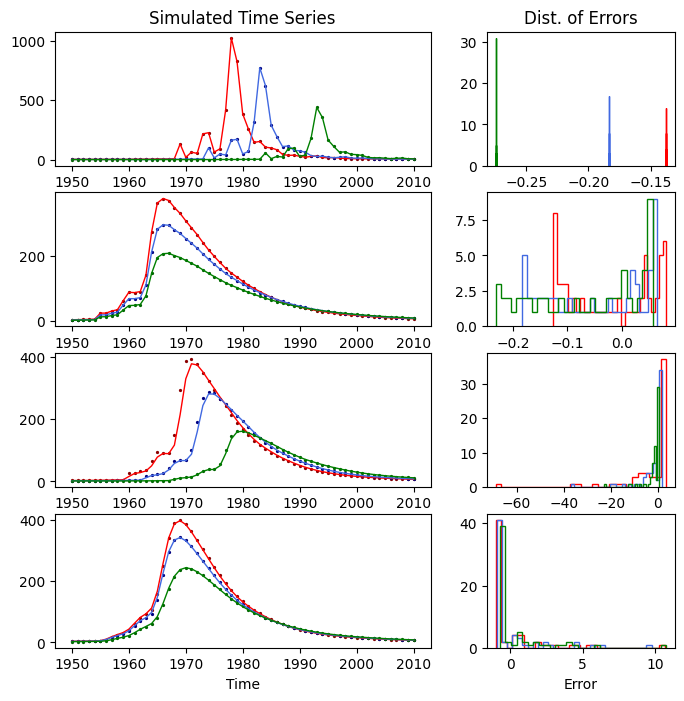

In [22]:
fig, ax = plt.subplots(
    4, 2,
    figsize=(8, 8),
    gridspec_kw={"width_ratios": [2, 1]},
    # sharex="col"
)

simulation_data = [pm_sims, em_sims, epm_sims, dm_sims]
benchmark_data = [pm_bms, em_bms, epm_bms, dm_bms]

colors_1 = ["red", "royalblue", "green"]
colors_2 = ["darkred", "navy", "darkgreen"]

# iterate over models / units
for i in range(4):
    unit_sims = simulation_data[i]
    unit_bms = benchmark_data[i]

    for j in range(len(unit_sims)):
        # plot simulation
        ax[i, 0].plot(
            unit_sims[j].index,
            unit_sims[j].values,
            c=colors_1[j],
            lw=1.
        )
        # plot benchmark
        ax[i, 0].scatter(
            unit_bms[j].index,
            unit_bms[j].values,
            c=colors_2[j],
            marker=".",
            s=7.
        )

        # plot errors
        errors = ((unit_sims[j].values - unit_bms[j].values) / unit_sims[j].values) * 100.
        # errors = (unit_sims[j].values - unit_bms[j].values)
        
        ax[i, 1].hist(
            errors,
            30,
            histtype="step",
            color=colors_1[j],
        )

# global settings
ax[-1, 0].set_xlabel("Time")
ax[0, 0].set_title("Simulated Time Series")
ax[-1, 1].set_xlabel("Error")
ax[0, 1].set_title("Dist. of Errors")

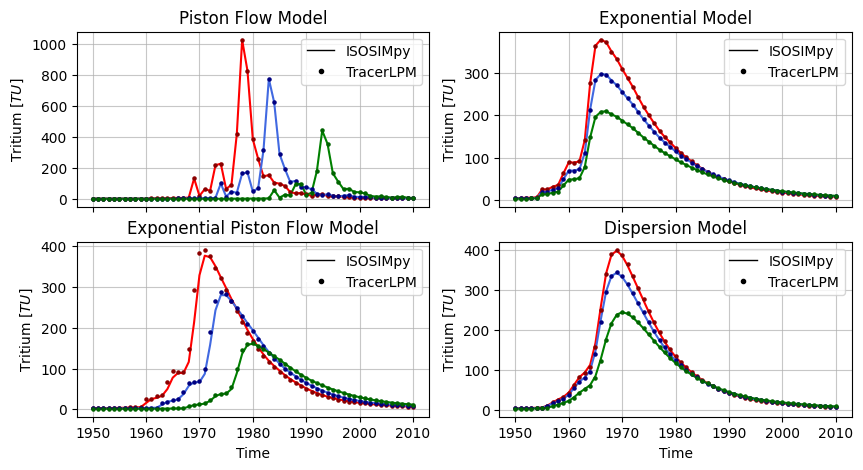

In [23]:
fig, ax = plt.subplots(
    2, 2,
    figsize=(10, 5),
    sharex="col",
    # sharey="row"
)

simulation_data = [pm_sims, em_sims, epm_sims, dm_sims]
benchmark_data = [pm_bms, em_bms, epm_bms, dm_bms]

names = ["Piston Flow Model", "Exponential Model", "Exponential Piston Flow Model", "Dispersion Model"]

colors_1 = ["red", "royalblue", "green"]
colors_2 = ["darkred", "navy", "darkgreen"]

# iterate over models / units
for i in range(4):
    unit_sims = simulation_data[i]
    unit_bms = benchmark_data[i]

    ax_ = ax.flatten()[i]

    for j in range(len(unit_sims)):
        # plot simulation
        ax_.plot(
            unit_sims[j].index,
            unit_sims[j].values,
            c=colors_1[j],
            lw=1.5,
            zorder=100
        )
        # plot benchmark
        ax_.scatter(
            unit_bms[j].index,
            unit_bms[j].values,
            c=colors_2[j],
            marker=".",
            s=20.,
            zorder=1000
        )
    # compose legend
    legend_elements = [
        Line2D([0], [0], color="k", lw=1, label="PyTracerLab"),
        Line2D([0], [0], marker=".", color="w",
               markerfacecolor="k", markeredgecolor="k", label="TracerLPM")
               ]
    ax_.legend(handles=legend_elements, loc="upper right")
    ax_.set_title(names[i])
    ax_.set_ylabel(r"Tritium $ [TU] $")
    ax_.grid(True, zorder=0, alpha=0.7)
    #ax_.set_xlim(unit_sims[j].index[0], unit_sims[j].index[-1])

    if i > 1:
        ax_.set_xlabel("Time")

# plt.savefig("simulation_benchmark.png", dpi=400, bbox_inches="tight")

## Calibration Benchmark

In [24]:
# input is already loaded

# load observations
file_name = "TracerLPM_benchmark_observations_6monthly.csv"
data = np.genfromtxt(
    file_name,
    delimiter=",",
    dtype=["<U7", float],
    encoding="utf-8",
    skip_header=1
)

obs_timestamps = np.array([datetime.strptime(row[0], r"%Y-%m") for row in data])
obs_series = np.array([[row[1]] for row in data], dtype=float)

In [25]:
# load input series with 6 month resolution
# this would be the tracer concentration in precipitation or recharge in a
# practical problem
file_name = "TracerLPM_benchmark_input_6monthly.csv"
data = np.genfromtxt(
    file_name,
    delimiter=",",
    dtype=["<U7", float],
    encoding="utf-8",
    skip_header=1
)

timestamps = np.array([datetime.strptime(row[0], r"%Y-%m") for row in data])
input_series = np.array([row[1] for row in data], dtype=float)

In [26]:
n_samples = 10000
burn_in = 50000
thin = 5
sigma = 1.
step_scale = .005 # .00005

### Mixing Ratio Case 1

In [27]:
# create model
t_half = 12.3 # years
lambda_ = np.log(2.0) / t_half

### define model (use the same structure / units as the true model)
# time step is 0.5 years
m1 = ism.Model(
    dt=.5,
    lambda_=lambda_,
    input_series=input_series,
    target_series=obs_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

pmfrac_1 = 0.05
emfrac_1 = 1 - pmfrac_1

# add a piston-flow unit
# define the true model parameters
pm_mtt_init = .5
m1.add_unit(
    ism.PMUnit(mtt=pm_mtt_init),
    fraction=pmfrac_1,
    bounds=[(0., 10.)],
    prefix="pm"
)

# add a exponential-flow unit
# define the true model parameters
em_mtt_init = 2.5
m1.add_unit(
    ism.EMUnit(mtt=em_mtt_init),
    fraction=emfrac_1,
    bounds=[(.1, 10.)],
    prefix="em"
)

# create a solver
solver = ism.Solver(m1)
res_1_x, res_1 = solver.differential_evolution()

### Mixing Ratio Case 2

In [28]:
# create model
t_half = 12.3 # years
lambda_ = np.log(2.0) / t_half

### define model (use the same structure / units as the true model)
# time step is 1 month
m2 = ism.Model(
    dt=.5,
    lambda_=lambda_,
    input_series=input_series,
    target_series=obs_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

pmfrac_2 = 0.15
emfrac_2 = 1 - pmfrac_2

# add a piston-flow unit
# define the true model parameters
pm_mtt_init = .5
m2.add_unit(
    ism.PMUnit(mtt=pm_mtt_init),
    fraction=pmfrac_2,
    bounds=[(0., 10.)],
    prefix="pm"
)

# add a exponential-flow unit
# define the true model parameters
em_mtt_init = 2.5
m2.add_unit(
    ism.EMUnit(mtt=em_mtt_init),
    fraction=emfrac_2,
    bounds=[(.1, 10.)],
    prefix="em"
)

# create a solver
solver = ism.Solver(m2)
res_2_x, res_2 = solver.differential_evolution()

### Mixing Ratio Case 3

In [29]:
# create model
t_half = 12.3 # years
lambda_ = np.log(2.0) / t_half

### define model (use the same structure / units as the true model)
# time step is 1 month
m3 = ism.Model(
    dt=0.5,
    lambda_=lambda_,
    input_series=input_series,
    target_series=obs_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

pmfrac_3 = 0.25
emfrac_3 = 1 - pmfrac_3

# add a piston-flow unit
# define the true model parameters
pm_mtt_init = .5
m3.add_unit(
    ism.PMUnit(mtt=pm_mtt_init),
    fraction=pmfrac_3,
    bounds=[(0., 10.)],
    prefix="pm"
)

# add a exponential-flow unit
# define the true model parameters
em_mtt_init = 2.5
m3.add_unit(
    ism.EMUnit(mtt=em_mtt_init),
    fraction=emfrac_3,
    bounds=[(.1, 10.)],
    prefix="em"
)

# create a solver
solver = ism.Solver(m3)
res_3_x, res_3 = solver.differential_evolution()

### Mixing Ratio Case 4

In [30]:
# create model
t_half = 12.3 # years
lambda_ = np.log(2.0) / t_half

### define model (use the same structure / units as the true model)
# time step is 1 month
m4 = ism.Model(
    dt=0.5,
    lambda_=lambda_,
    input_series=input_series,
    target_series=obs_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

pmfrac_4 = 0.4
emfrac_4 = 1 - pmfrac_4

# add a piston-flow unit
# define the true model parameters
pm_mtt_init = .5
m4.add_unit(
    ism.PMUnit(mtt=pm_mtt_init),
    fraction=pmfrac_4,
    bounds=[(0., 10.)],
    prefix="pm"
)

# add a exponential-flow unit
# define the true model parameters
em_mtt_init = 2.5
m4.add_unit(
    ism.EMUnit(mtt=em_mtt_init),
    fraction=emfrac_4,
    bounds=[(.1, 10.)],
    prefix="em"
)

# create a solver
solver = ism.Solver(m4)
res_4_x, res_4 = solver.differential_evolution()
print(res_4_x)

{'pm.mtt': 0.7499253943715054, 'em.mtt': 9.999269963599176}


In [31]:
def nse(obs, sim):
    obs_ = obs.reshape(-1, 1)
    sim_ = sim.reshape(-1, 1)
    mask = ~np.isnan(obs_) & ~np.isnan(sim_)
    resid = sim_ - obs_
    dev = obs_ - np.nanmean(obs_)
    nse_ = 1 - np.sum(resid[mask] ** 2) / np.sum(dev[mask] ** 2)
    return nse_

print(nse(obs_series, res_1))

0.8250317887139573


Text(0, 0.5, 'Fraction $ [-] $')

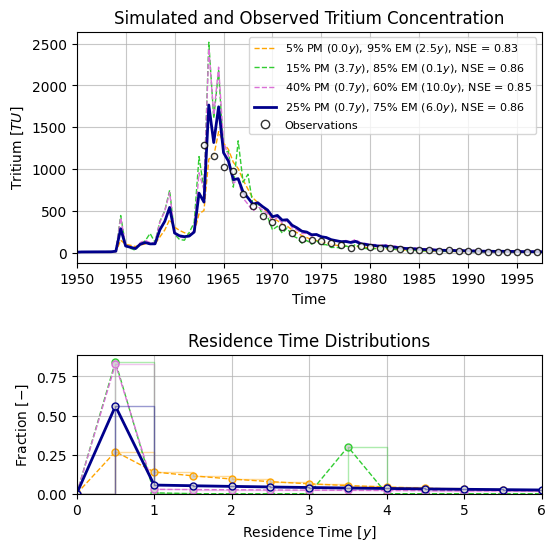

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), gridspec_kw={"height_ratios": [2, 1.2], "hspace": .5})

ax1 = ax[1]
ax = ax[0]

data_sims = [res_1, res_2, res_4, res_3]
colors = ["orange", "limegreen", "orchid", "darkblue"] # mpl.colormaps["Set2"].colors # ["r", "g", "b", "m"]
linestyles = ["--"] *3 + ["-"] # ["-.", "--", "-", ":"]
lws = [1.] * 3 + [2.]
start = 100
end = 196

for num, sims in enumerate(data_sims):
    ax.plot(
        timestamps[start:end],
        sims[start:end],
        c=colors[num],
        ls=linestyles[num],
        lw=lws[num]
    )

ax.scatter(
    obs_timestamps, obs_series,
    marker="o", facecolor="w",
    edgecolor="k", s=20,
    zorder=100, alpha=0.8,
    lw=1.
)

ax.grid(True, alpha=0.7, zorder=0)
ax.set_xlim([timestamps[start], timestamps[end-1]])
ax.set_xlabel("Time")
ax.set_ylabel(r"Tritium $ [TU] $")

custom_lines = [Line2D([0], [0], color=colors[0], lw=lws[0], ls=linestyles[0]),
                Line2D([0], [0], color=colors[1], lw=lws[1], ls=linestyles[1]),
                Line2D([0], [0], color=colors[2], lw=lws[2], ls=linestyles[2]),
                Line2D([0], [0], color=colors[3], lw=lws[3], ls=linestyles[3]),
                Line2D([0], [0], marker="o", color="w", markeredgewidth=1.,
                    markerfacecolor="w", markeredgecolor="k", alpha=0.8)]

ax.legend(
    custom_lines,
    [
    fr"{pmfrac_1:.0%} PM (${res_1_x["pm.mtt"]:.1f}y$), " + \
        fr"{emfrac_1:.0%} EM (${res_1_x["em.mtt"]:.1f}y$), " + \
            fr"NSE = {nse(obs_series, res_1):.2f}",
    fr"{pmfrac_2:.0%} PM (${res_2_x["pm.mtt"]:.1f}y$), " + \
        fr"{emfrac_2:.0%} EM (${res_2_x["em.mtt"]:.1f}y$), " + \
            fr"NSE = {nse(obs_series, res_2):.2f}",
    fr"{pmfrac_4:.0%} PM (${res_4_x["pm.mtt"]:.1f}y$), " + \
        fr"{emfrac_4:.0%} EM (${res_4_x["em.mtt"]:.1f}y$), " + \
            fr"NSE = {nse(obs_series, res_4):.2f}",
    fr"{pmfrac_3:.0%} PM (${res_3_x["pm.mtt"]:.1f}y$), " + \
        fr"{emfrac_3:.0%} EM (${res_3_x["em.mtt"]:.1f}y$), " + \
            fr"NSE = {nse(obs_series, res_3):.2f}",
    "Observations"
    ],
    loc="upper right",
    fontsize=8
)
ax.set_title("Simulated and Observed Tritium Concentration")

# plot age distribution

age_distributions = m3.get_age_distributions()
age_distributions2 = m2.get_age_distributions()

step_limit = 13
dt = 0.5
t_plot = [dt * i for i in range(step_limit)]
# ax.plot(age_distributions["fractions"][0] * age_distributions["distributions"][0][:step_limit])
# ax.plot(age_distributions["fractions"][1] * age_distributions["distributions"][1][:step_limit])
for num, ml in enumerate([m1, m2, m4, m3]):
    age_distributions = ml.get_age_distributions()
    ax1.plot(
        t_plot, 
        age_distributions["fractions"][0] * age_distributions["distributions"][0][:step_limit] + \
        age_distributions["fractions"][1] * age_distributions["distributions"][1][:step_limit],
        marker=".",
        markeredgecolor=colors[num],
        lw=lws[num],
        c=colors[num],
        markerfacecolor="lightgrey",
        markersize=10,
        # clip_on=False,
        # zorder=1000
        ls=linestyles[num]
    )
    ax1.step(
        t_plot, 
        age_distributions["fractions"][0] * age_distributions["distributions"][0][:step_limit] + \
        age_distributions["fractions"][1] * age_distributions["distributions"][1][:step_limit],
        # marker=".",
        markeredgecolor=colors[num],
        lw=1.,
        c=colors[num],
        markerfacecolor="lightgrey",
        markersize=10,
        # clip_on=False,
        # zorder=1000
        ls="-",
        where="post",
        alpha=0.4
    )
ax1.set_xlim(0., step_limit * dt - dt)
ax1.set_ylim(0.)
ax1.grid(True, alpha=0.7, zorder=0)
ax1.set_title("Residence Time Distributions")
ax1.set_xlabel(r"Residence Time $ [y] $")
ax1.set_ylabel(r"Fraction $ [-] $")

# ax.set_yscale("log")
# plt.savefig("calibration_benchmark.png", dpi=400, bbox_inches="tight")

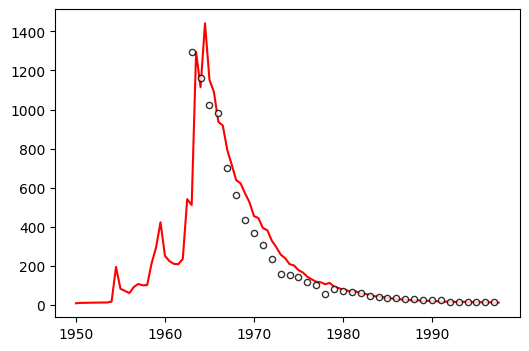

In [33]:
# create model
t_half = 12.3 # years
lambda_ = np.log(2.0) / t_half

### define model (use the same structure / units as the true model)
# time step is 1 month
m2 = ism.Model(
    dt=.5,
    lambda_=lambda_,
    input_series=input_series,
    target_series=obs_series,
    steady_state_input=6.,
    n_warmup_half_lives=10
)

pmfrac_2 = .13
emfrac_2 = 1 - pmfrac_2

# add a piston-flow unit
# define the true model parameters
pm_mtt_init = .0001
m2.add_unit(
    ism.PMUnit(mtt=pm_mtt_init),
    fraction=pmfrac_2,
    bounds=[(0., 10.)],
    prefix="pm"
)

# add a exponential-flow unit
# define the true model parameters
em_mtt_init = 4.3
m2.add_unit(
    ism.EMUnit(mtt=em_mtt_init),
    fraction=emfrac_2,
    bounds=[(.1, 10.)],
    prefix="em"
)

# create a solver
sim = m2.simulate()

fig, ax = plt.subplots(figsize=(6, 4))

start = 100
end = 196

ax.plot(
    timestamps[start:end],
    sim[start:end],
    c="r",
)

ax.scatter(
    obs_timestamps, obs_series,
    marker="o", facecolor="w",
    edgecolor="k", s=20,
    zorder=100, alpha=0.8,
    lw=1.
)